逻辑回归解决信用卡欺诈
二分类问题，区分正样本和负样本的问题
一般而言，大部分样本都是正常样本，极少数是负样本

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [74]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


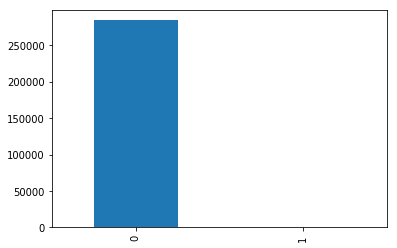

In [75]:
count_class = pd.value_counts(data['Class'],sort=True).sort_index()
count_class.plot(kind='bar')

上面数据0样本28万多， 1样本几百个，
针对样本数据不对称，正样本远多于负样本，两种解决方案：采用过采样 和 下采样的方式

过采样（一样多）：对较少的1样本，采用生成策略，生成出一批数据，使得1样本和0样本趋于一样多

下采样（一样少）：让0和1的两个样本一样小， 也就是从0的样本里面选出来和1的样本数量一样多的样本，

下面有请 sklearn:

去掉 'Time' 列
标准化'Amount' 列
Amount 数值 差异比较大，在机器学习中，要保证数据之前的特征差异是差不多的 ，所以做了一个标准化化，在-1 ~ 1区间 ， fit_transform(),让原先的'Amount'列变成'normAmount'列，从而得到新的特征

In [76]:
from sklearn.preprocessing import StandardScaler
    
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
#convert a row vector like array([0, 1, 2]) to a column vector like array([[0], [1], [2]]), np.reshape(x, (-1,1)) 
data= data.drop(['Time','Amount'],axis =1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


下采样

In [77]:
X = data.loc[:,data.columns!='Class']
y = data.loc[:,data.columns=='Class']

#Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1]) #诈骗数据条数
fraud_indices = np.array(data[data.Class == 1].index)

#Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index#数据的index值

#out of the indices we picked, randomly select "x" number(number_records_fraud)

#在 normal_indices 中随机选择 数量为number_records_fraud个元素
random_normal_indices = np.random.choice(normal_indices,number_records_fraud,replace=False)
random_normal_indices = np.array(random_normal_indices)

#Appending the 2 indices 合并两个索引
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

#通过索引获取数据
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.loc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.loc[:,under_sample_data.columns == 'Class']


#showing ratio
#print 'Percentage of normal transactions: ',len(under_sample_data[under_sample_data.Class ==0])/float(len(under_sample_data))
#print 'Percentage of fraud transactions: ',len(under_sample_data[under_sample_data.Class ==1])/float(len(under_sample_data))
#print 'Total number of transactions:' , len(under_sample_data)

交叉验证 与 留一验证

In [78]:
from sklearn.cross_validation import train_test_split

#whole dataset 训练集拆分 0.3做测试集，0.7做训练集 random_state表示 为了每次随机出的值都是一样的，也即，
#确定下来random_state是某个值后，重复调用这个函数，划分结果是确定的
# - 用来做数据验证的
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state =0)

#undersampled dataset  下采样的数据集获取 - 用来 机器学习的
X_train_undersample, X_test_undersample, y_train_undersample,y_test_undersample =\
    train_test_split(X_undersample,y_undersample,test_size=0.3,random_state=0)

# 模型评估 recall （召回率）

模型评估
样本数据不均匀的情况下，精度并不能表示模型的好坏，比如1000个人里有10个不正常， 而模型固定认为1000个人都正常，则精度是（1000-10）/1000 = 99%，但这样的模型是没有用的，因为它根本预测不出来不正常的人

recall值(召回率 查全率) ： 比如1000个人有10个不正常， 模型跑出来有1个人不正常，那么recall = 1/10 = 0.1

TP(true positive):分类正确，把原本属于正类的样本分成正类。

TN(true negative):分类正确，把原本属于负类的样本分成负类。

FP(false positive):分类错误，把原本属于负类的错分成了正类。

FN(false negative):分类错误，把原本属于正类的错分成了负类。

Recall = TP/(TP+FN)

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold,cross_val_score # 做交叉验证时 做几倍的交叉验证
from sklearn.metrics import confusion_matrix,recall_score,classification_report

In [80]:
from sklearn.model_selection import StratifiedKFold
X = np.array([[1, 2, 3, 4],
              [11, 12, 13, 14],
              [21, 22, 23, 24],
              [31, 32, 33, 34],
              [41, 42, 43, 44],
              [51, 52, 53, 54],
              [61, 62, 63, 64],
              [71, 72, 73, 74]])

y = np.array([1, 1, 0, 0, 1, 1, 0, 0])

stratified_folder = StratifiedKFold(n_splits=4, random_state=0, shuffle=False)
for train_index, test_index in stratified_folder.split(X, y):
    #print("Stratified Train Index:", train_index)
    #print("Stratified Test Index:", test_index)
    print("Stratified y_train:", y[train_index])
    #print("Stratified y_test:", y[test_index],'\n')

('Stratified y_train:', array([1, 0, 1, 1, 0, 0]))
('Stratified y_train:', array([1, 0, 1, 1, 0, 0]))
('Stratified y_train:', array([1, 1, 0, 0, 1, 0]))
('Stratified y_train:', array([1, 1, 0, 0, 1, 0]))


pd.DataFrame介绍：
class pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)¶
Two-dimensional size-mutable,
data structure with labeled axes (rows and columns)
data : numpy ndarray (structured or homogeneous), dict, or DataFrame

Dict can contain Series, arrays, constants, or list-like objects

Changed in version 0.23.0: If data is a dict, argument order is maintained for Python 3.6 and later.

index : Index or array-like

Index to use for resulting frame. Will default to RangeIndex if no indexing information part of input data and no index provided

columns : Index or array-like

Column labels to use for resulting frame. Will default to RangeIndex (0, 1, 2, …, n) if no column labels are provided

dtype : dtype, default None

Data type to force. Only a single dtype is allowed. If None, infer

copy : boolean, default False

Copy data from inputs. Only affects DataFrame / 2d ndarray input

# sklearn.linear_model.LogisticRegression

class sklearn.linear_model.LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0, 
      fit_intercept=True, intercept_scaling=1, class_weight=None,random_state=None, solver=’warn’, max_iter=100,multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None)¶

Logistic Regression (aka logit, MaxEnt) classifier.  又叫logit ， 最大熵  分类模型



In [136]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(len(y_train_data),5,shuffle = False)
    print fold
    #Different C parameters 惩罚项
    c_param_range = [0.01,0.1,1,10,100]
    
    results_table = pd.DataFrame(index=range(len(c_param_range),2),columns=['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range
    #print range(len(c_param_range))
    #print results_table
    #the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j =0
    for c_param in c_param_range:
        print '-----------------'
        print 'this time we use C parameter: ',c_param
        print '-----------------'
        print ''
        
        recall_accs = []
        for iteration, indices in enumerate(fold,start =1):
            #call logistic regression with a C parameter  建立模型 ， 使用L1惩罚：|w|演示
            lr = LogisticRegression(C = c_param,penalty='l1')
     
            # Use the training data to fit the model.  使用训练集对模型进行训练 调用者为选用的模型
            #In this case, we use the portion of the fold to train the model with indices[0].
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())
            
            # Predict values using the test indices[1] in the training data 先使用训练集的数据进行对模型的验证
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)
            
            #Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            #计算recall值，并赋给recall值的列
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print ('Iteration',iteration,':recall scrore = ',recall_acc)
        
        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j+= 1
        print ('')
        print ('Mean recall score',np.mean(recall_accs))
        print ('')
            
        
#     best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
#     # Finally, we can check which C parameter is the best amongst the chosen. 找出recall值较高的模型的参数
#     print ('*********************************************************************************')
#     print ('Best model to choose from cross validation is with C parameter = ', best_c)
#     print ('*********************************************************************************')
    
#     return best_c

In [137]:

best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

sklearn.cross_validation.KFold(n=688, n_folds=5, shuffle=False, random_state=None)
-----------------
this time we use C parameter:  0.01
-----------------

('Iteration', 1, ':recall scrore = ', 0.9315068493150684)
('Iteration', 2, ':recall scrore = ', 0.9315068493150684)
('Iteration', 3, ':recall scrore = ', 1.0)
('Iteration', 4, ':recall scrore = ', 0.9594594594594594)
('Iteration', 5, ':recall scrore = ', 0.9696969696969697)

('Mean recall score', 0.9584340255573132)

-----------------
this time we use C parameter:  0.1
-----------------

('Iteration', 1, ':recall scrore = ', 0.8493150684931506)
('Iteration', 2, ':recall scrore = ', 0.863013698630137)
('Iteration', 3, ':recall scrore = ', 0.9491525423728814)
('Iteration', 4, ':recall scrore = ', 0.9459459459459459)
('Iteration', 5, ':recall scrore = ', 0.9090909090909091)

('Mean recall score', 0.9033036329066049)

-----------------
this time we use C parameter:  1
-----------------

('Iteration', 1, ':recall scrore = ', 0.8493150684

TypeError: reduction operation 'argmax' not allowed for this dtype

SMOTE 算法